# Importing libraries

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing data
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Performing EDA On Data

# Checking Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [22]:
# Renaming column
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [23]:
#Data description
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [24]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [25]:
# Checking for Duplicate Values
df[df.duplicated()].shape

(0, 2)

In [26]:
df[df.duplicated()]

,Delivery Time,Sorting Time


# Plotting the data to check for outliers

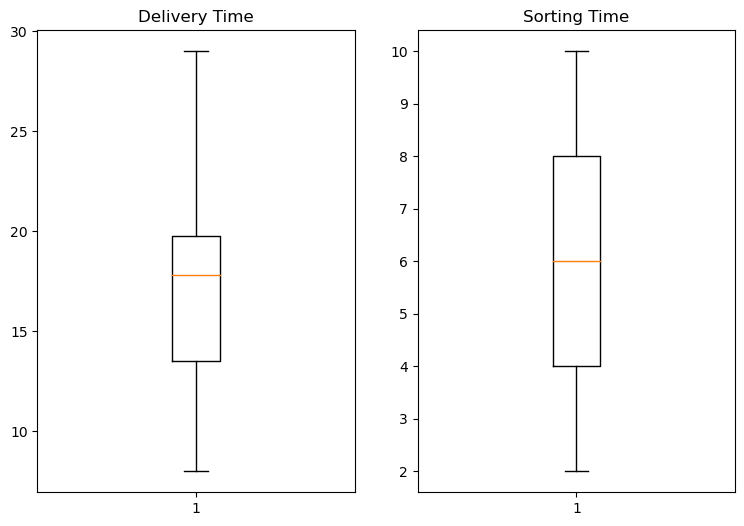

In [27]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

- As you can see there are no Outliers in the data.

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

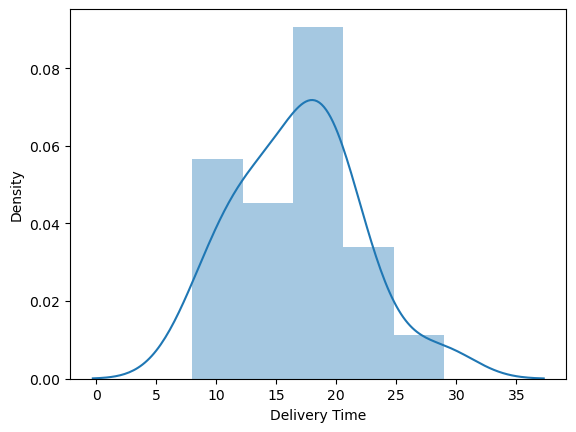

In [28]:
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

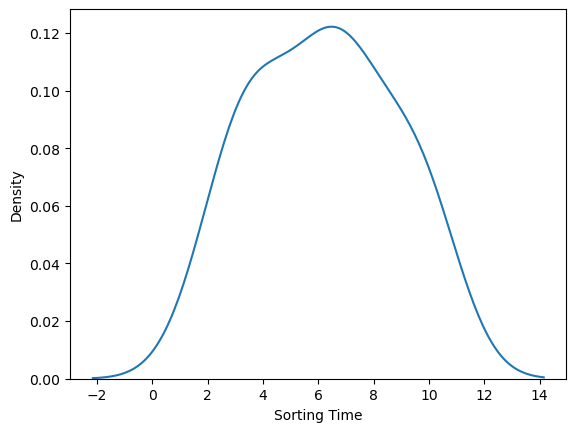

In [29]:
sns.kdeplot(df['Sorting Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

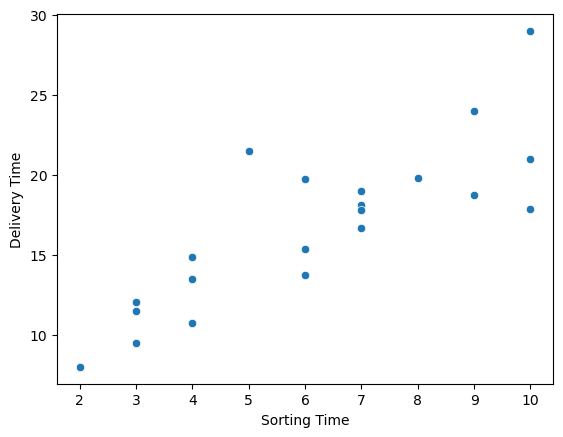

In [30]:
#Correlation analysis
sns.scatterplot(df['Sorting Time'],df['Delivery Time'])

In [31]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


-  As you can see above
- There is good correlation between the two variable.

<AxesSubplot:>

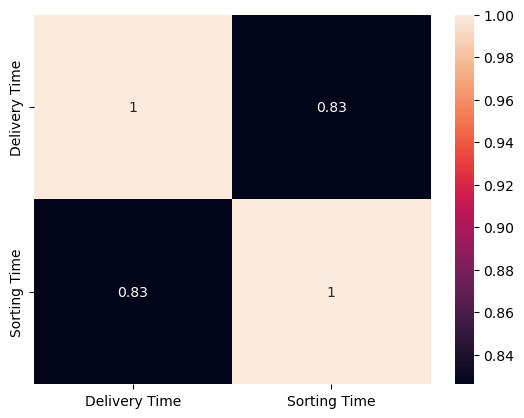

In [32]:
sns.heatmap(df.corr(), annot=True)

# Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression

It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [35]:
model = sm.ols('Delivery_Time~Sorting_Time', data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        12:24:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- As you can notice in the above model
The R-squared and Adjusted R-squared scores are still below 0.85.

(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
Lets Try some data transformation to check whether these scores can get any higher than this.

# Square Root transformation on data

In [36]:
model1 = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 22 Feb 2023   Prob (F-statistic):           8.48e-07
Time:                            13:37:33   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.

Lets Try other data transformation to check whether these scores can get any higher than this.

# Cube Root transformation on Data

In [38]:
model2 = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Wed, 22 Feb 2023   Prob (F-statistic):           4.90e-07
Time:                            13:39:38   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on Data

In [37]:
model3 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 22 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           13:39:03   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model
- Yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction.
- Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.

# Model Testing
As Y = Beta0 + Beta1*(X)

Finding Coefficient Parameters (Beta0 and Beta1 values)

In [42]:
model = smf.ols('Delivery_Time~Sorting_Time', data = df1).fit()

In [43]:
#Model parameters
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

Here, (Intercept) Beta0 value = 6.58 & (Sorting Time) Beta1 value = 1.64

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [44]:
#Print values for t value and p value
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


(Intercept) Beta0: tvalue=3.82 , pvalue=0.001147

(daily) Beta1: tvalue=6.38, pvalue=0.000004

As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable.

R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [45]:
#r2 value
model.rsquared

0.6822714748417231

# Model Validation
- Comparing different models with respect to their Root Mean Squared Errors
- We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
model1_pred_y =np.square(model1.predict(df1['Sorting_Time']))
model2_pred_y =pow(model2.predict(df1['Sorting_Time']),3)
model3_pred_y =np.exp(model3.predict(df1['Sorting_Time']))

In [42]:
model1_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.9349037688901394 
model1= 2.762294279320867 
model2= 2.755584309893575 
model3= 2.7458288976145497


In [43]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model2'

- As model2 has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model2 to predict our values

# Predicting values from Model with Log Transformation on the Data

In [44]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df1.Sorting_Time
predicted['Delivery_Time'] = df1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


# Predicitng from Original Model without any data transformation

In [46]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = df1.Sorting_Time
predicted1['Delivery_Time'] = df1.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
